<a href="https://colab.research.google.com/github/gusriobr/keras/blob/master/Tinkering_with_tensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
from keras import backend as K 
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras import optimizers

In [44]:
A = np.random.random((1000,32,64,3))
# B = np.moveaxis( A, 3, 1)
C = np.transpose( A, (0,3,1,2))

print (A.shape)
print (C.shape)

A_t = K.variable(A)
C_t = K.permute_dimensions(A_t, (0,3,1,2))

print (K.eval(A_t).shape)
print (K.eval(C_t).shape)

(1000, 32, 64, 3)
(1000, 3, 32, 64)
(1000, 32, 64, 3)
(1000, 3, 32, 64)


Lets try to calculate the mininum of the sqrt function using tensors.


**Place holders and variables**

Given the expression of simple linear regression WX+B=Y, X and Y are values of the samples (observations) and hence need a place to be filled, while W and B are the weights and bias, Variables(the previous value affects the later) in the graph which should be trained using different X and Y pairs. 

We place different samples to the Placeholders to train the Variables.

X, Y --> place holders
W, B --> variables

https://stackoverflow.com/questions/36693740/whats-the-difference-between-tf-placeholder-and-tf-variable


In [45]:
########################3
# creating placeholders
########################3

inputs = K.placeholder(shape=(2, 4, 5))
# also works:
inputs = K.placeholder(shape=(None, 4, 5))
# also works:
inputs = K.placeholder(ndim=3)

print(inputs)

print("Is a placeholder a keras tensor?: {}\n\n".format(K.is_keras_tensor(inputs)))

########################3
# creating variables
########################3
# from a numpy array
val = np.random.random((3, 4, 5))
var = K.variable(value=val)

# all-zeros variable:
var = K.zeros(shape=(3, 4, 5))
# all-ones:
var = K.ones(shape=(3, 4, 5))

print (var)
print("Is a variable a keras tensor?: {}".format(K.is_keras_tensor(inputs)))


            
# variables can be initialized using probabilistic distributions
a = K.random_uniform_variable(shape=(3, 4), low=0, high=1) # Uniform distribution
b = K.random_normal_variable(shape=(3, 4), mean=0, scale=1) # Gaussian distribution
c = K.random_binomial(shape=(3, 4))

print("{}_ {}".format(b.shape, c.shape))

Tensor("Placeholder_5:0", shape=(?, ?, ?), dtype=float32)
Is a placeholder a keras tensor?: False


<tf.Variable 'Variable_9:0' shape=(3, 4, 5) dtype=float32_ref>
Is a variable a keras tensor?: False
(3, 4)_ (3, 4)


In [46]:
### CREATING TENSORS

keras_input = Input([10])

print("Is an Input a keras tensor?: {}".format(K.is_keras_tensor(keras_input)))

Is an Input a keras tensor?: True


In [47]:
# Tensor Arithmetic
e = a + b * K.abs(c)
f = K.dot(e, K.transpose(b))
g = K.sum(f, axis=1)
h = K.softmax(g)
i = K.concatenate([b, c], axis=-1)

K.eval(i)


array([[-0.11409766,  0.0387001 , -0.7009329 , -1.8853498 ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 1.6436895 ,  1.8386176 ,  0.5620149 ,  1.1032035 ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.7666586 , -0.02094654, -0.3254734 ,  0.9055448 ,  0.        ,
         0.        ,  0.        ,  0.        ]], dtype=float32)

In [48]:
###########################
### Functions
###########################
inputs = K.placeholder(shape=(4,), name="finput")

square = K.square(inputs)

f_square = K.function([inputs], [square])

x = np.array([1,2,3,4])

print( f_square([x]) )


# you must feed a function with a place holder, not with a variable
# this code will fail in the evaluation of the function asking
# you to put a place holder in the input

input_var = K.ones(shape=(4), name="finput")

f_square_var = K.function([input_var], [square])
try:
   f_square_var([x])
except:
  print("It didn't work....")
  pass



[array([ 1.,  4.,  9., 16.], dtype=float32)]
It didn't work....


In [49]:
## functions can have multiple inputs and multiple outputs

in_a = K.placeholder(shape=(3,3), name="in_a")
in_b = K.placeholder(shape=(3,3), name="in_b")

f1 = K.sum(K.square(a - b))
f2 = K.mean(a) + K.std(b)

f = K.function([a,b], [f1, f2])

# let get some random matrices
m_a = np.random.randint(5, size=(3,3))
m_b = np.random.randint(5, size=(3,3))
print("a: {}\n\n b:{}\n".format(m_a,m_b))


output = f([m_a,m_b])

# lets make it by hand
f1_expected = (m_a-m_b)*(m_a-m_b)
f1_expected = np.sum(f1_expected.flatten())

f2_expected = np.mean(m_a.flatten()) + np.std(m_b.flatten())

print("f1 Expected: {}, tensor ouput: {}".format(f1_expected,output[0]))
print("f2 Expected: {}, tensor ouput: {}".format(f2_expected,output[1]))


a: [[4 0 3]
 [0 0 1]
 [4 0 1]]

 b:[[1 1 2]
 [3 3 1]
 [0 0 4]]

f1 Expected: 54, tensor ouput: 54.0
f2 Expected: 2.7777777777777777, tensor ouput: 2.777777671813965


i:-5 f1: 25.0, grad: [-10.]
i:-4 f1: 16.0, grad: [-8.]
i:-3 f1: 9.0, grad: [-6.]
i:-2 f1: 4.0, grad: [-4.]
i:-1 f1: 1.0, grad: [-2.]
i:0 f1: 0.0, grad: [0.]
i:1 f1: 1.0, grad: [2.]
i:2 f1: 4.0, grad: [4.]
i:3 f1: 9.0, grad: [6.]
i:4 f1: 16.0, grad: [8.]
i:5 f1: 25.0, grad: [10.]


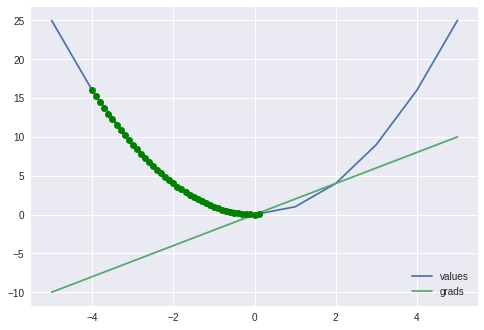

Minimum value: [0.19999687]


In [50]:
#### FUNCTION GRADIENTS

in_a = K.placeholder(shape=(1), name="in_a")
in_b = K.placeholder(shape=(3,3), name="in_b")

f1 = K.square(in_a)

grads = K.gradients([f1], [in_a])[0]

iterate = K.function([in_a], [f1, grads])


var_a = np.random.uniform(5, size=(1))
values = []
grads = []

for i in range(-5,6):
  output = iterate([i])
  values.append(output[0])
  grads.append(output[1])
  print("i:{} f1: {}, grad: {}".format(i, output[0], output[1]))
  
var_i = -4.0
step_size = 0.2
min_step = 0.1
x_values = []
f_points = []
current_value = 999
last_value = 1000
i = 0
max_iters = 200

while current_value < last_value  and i < max_iters:
  output = iterate([var_i])
  step = output[1] * step_size
  if(step < min_step):
    step = np.sign(output[1]) * min_step
  
  last_value = current_value
  current_value = output[0]
  
  x_values.append(var_i)
  f_points.append(current_value)
  var_i = var_i-step
  i = i+1
  
plt.plot(range(-5,6), values, label="values")
plt.plot(range(-5,6), grads, label="grads")
plt.plot(x_values, f_points, color='green', marker='o', linestyle='dashed')
plt.legend()
plt.show()

print("Minimum value: {}".format(output[1]))
# lets try to calculate the minimum value of e


The algorithm reaches the lowest point and stops in the next step when it detects de obtained value is greater that the last one. Not a very good strategy, but good enough to show how to use a K.function to iterate over loss and gradient.

In [0]:
# lets use a wrapper to calculate the mininum using scipy BFGS optimizer
class Evaluator(object):

    def __init__(self, loss_and_grad_function):
        self.loss_value = None
        self.grads_values = None
        self.fetch_loss_and_grads = loss_and_grad_function

    def loss(self, x):
        assert self.loss_value is None
        outs = self.fetch_loss_and_grads([x])

        self.loss_value = outs[0]
        self.grad_values = outs[1].flatten().astype('float64')
        return self.loss_value

    def grads(self, x):
        grad_values = np.copy(self.grad_values)
        self.loss_value = None
        self.grad_values = None
        return grad_values


In [52]:
      
from scipy.optimize import fmin_l_bfgs_b

evaluator = Evaluator(iterate)
iterations = 20
x = -15 #x0
for i in range(iterations):
  x, min_val, info = fmin_l_bfgs_b(evaluator.loss, x,
                                   fprime=evaluator.grads, maxfun=20)
  
  
print("Minimum value: {}".format(min_val))
print(info)

  

Minimum value: [0.]
{'grad': array([0.]), 'task': b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL', 'funcalls': 1, 'nit': 0, 'warnflag': 0}
